<a href="https://colab.research.google.com/github/SuperGeekBrain/coal-exploration/blob/master/Trading_Algoritms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Describtion: This program uses the dual moving average crossover to determine when to buy and sell stock.

In [67]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [113]:
#Load the data
from google.colab import files
uploaded= files.upload()

Saving TSLA2020.xlsx to TSLA2020.xlsx


In [114]:
#Store the data
TSLA = pd.read_excel('TSLA2020.xlsx')
#Show the data
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,134.738007,157.227997,134.703995,156.000000,156.000000,236167500
1,2020-02-04,176.591995,193.798004,166.776001,177.412003,177.412003,304694000
2,2020-02-05,164.651993,169.195999,140.822006,146.940002,146.940002,242119000
3,2020-02-06,139.983994,159.166000,137.399994,149.792007,149.792007,199404000
4,2020-02-07,146.110001,153.949997,146.000000,149.613998,149.613998,85317500
...,...,...,...,...,...,...,...
247,2021-01-26,891.380005,895.900024,871.599976,883.090027,883.090027,23131600
248,2021-01-27,870.349976,891.500000,858.659973,864.159973,864.159973,27334000
249,2021-01-28,820.000000,848.000000,801.000000,835.429993,835.429993,26378000
250,2021-01-29,830.000000,842.409973,780.099976,793.530029,793.530029,34990800


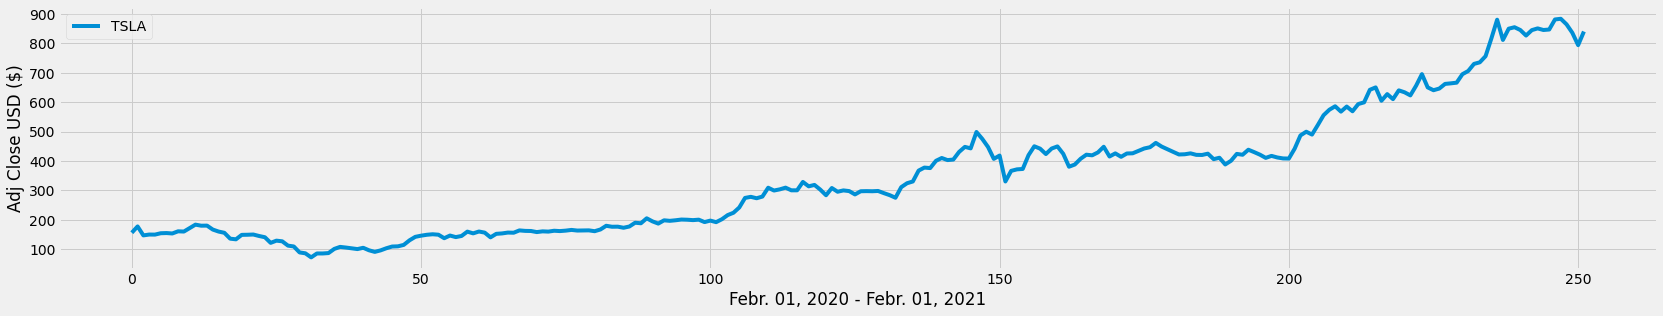

In [116]:
#Visualize the data
plt.figure(figsize=(25.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.xlabel('Febr. 01, 2020 - Febr. 01, 2021')
plt.ylabel( 'Adj Close USD ($)')
plt.legend(loc='upper left')
plt.show()

In [117]:
#Create the simple moving average with a 10 day window
SMA10 = pd.DataFrame()
SMA10['Adj Close'] = TSLA['Adj Close'].rolling(window= 10).mean()
SMA10

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,852.552997
248,854.024994
249,852.126996
250,846.979999


In [118]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = TSLA['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,747.948667
248,756.421000
249,762.940999
250,768.283667


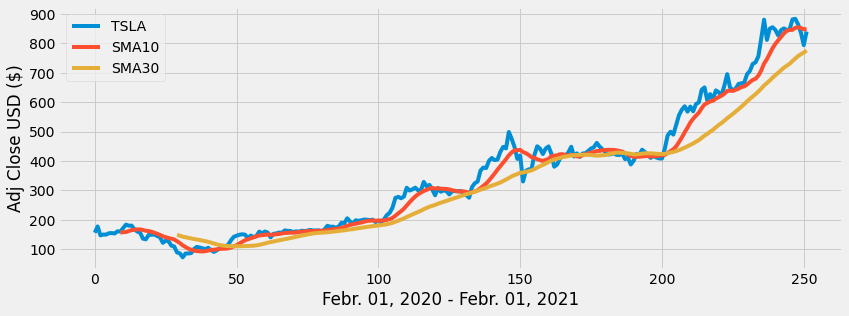

In [120]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.plot(SMA10['Adj Close'], label = 'SMA10')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.xlabel('Febr. 01, 2020 - Febr. 01, 2021')
plt.ylabel('Adj Close USD ($)')
plt.legend(loc='upper left')
plt.show()

In [121]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['TSLA'] = TSLA['Adj Close']
data['SMA10'] = SMA10['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data

,TSLA,SMA10,SMA30
0,156.000000,NaN,NaN
1,177.412003,NaN,NaN
2,146.940002,NaN,NaN
3,149.792007,NaN,NaN
4,149.613998,NaN,NaN
...,...,...,...
247,883.090027,852.552997,747.948667
248,864.159973,854.024994,756.421000
249,835.429993,852.126996,762.940999
250,793.530029,846.979999,768.283667


In [122]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA10'][i] > data['SMA30'][i]:
      if flag != 1:
        sigPriceBuy.append(data['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
        flag = 0
    elif data['SMA10'][i] < data['SMA30'][i]:
      if flag != 0:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(data['TSLA'][i])
      else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)


In [123]:
#Store the Buy and Sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [124]:
#Show the data
data

,TSLA,SMA10,SMA30,Buy_Signal_Price,Sell_Signal_Price
0,156.000000,NaN,NaN,NaN,NaN
1,177.412003,NaN,NaN,NaN,NaN
2,146.940002,NaN,NaN,NaN,NaN
3,149.792007,NaN,NaN,NaN,NaN
4,149.613998,NaN,NaN,NaN,NaN
...,...,...,...,...,...
247,883.090027,852.552997,747.948667,NaN,NaN
248,864.159973,854.024994,756.421000,864.159973,NaN
249,835.429993,852.126996,762.940999,NaN,NaN
250,793.530029,846.979999,768.283667,793.530029,NaN


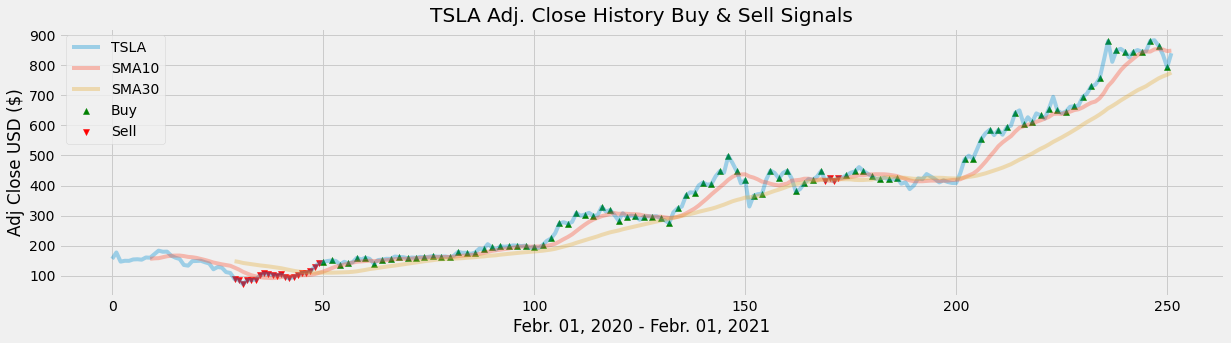

In [127]:
#Visualize the data and strategy to buy and sell the stock
plt.figure(figsize=(18.6, 4.6))
plt.plot(data['TSLA'], label = 'TSLA', alpha = 0.35)
plt.plot(data['SMA10'], label = 'SMA10', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('TSLA Adj. Close History Buy & Sell Signals')
plt.xlabel('Febr. 01, 2020 - Febr. 01, 2021')
plt.ylabel('Adj Close USD ($)')
plt.legend(loc='upper left')
plt.show()
